# French women and men salaries comparing

Importing all necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing dataset

In [3]:
df = pd.read_csv('net_salary_per_town_categories.csv')

### Unique codes for the data set
```
CODGEO : unique code of the town
LIBGEO : name of the town
SNHM14 : mean net salary
SNHMC14 : mean net salary per hour for executive
SNHMP14 : mean net salary per hour for middle manager
SNHME14 : mean net salary per hour for employee
SNHMO14 : mean net salary per hour for worker
SNHMF14 : mean net salary for women
SNHMFC14 : mean net salary per hour for feminin executive
SNHMFP14 : mean net salary per hour for feminin middle manager
SNHMFE14 : mean net salary per hour for feminin employee
SNHMFO14 : mean net salary per hour for feminin worker
SNHMH14 : mean net salary for man
SNHMHC14 : mean net salary per hour for masculin executive
SNHMHP14 : mean net salary per hour for masculin middle manager
SNHMHE14 : mean net salary per hour for masculin employee
SNHMHO14 : mean net salary per hour for masculin worker
SNHM1814 : mean net salary per hour for 18-25 years old
SNHM2614 : mean net salary per hour for 26-50 years old
SNHM5014 : mean net salary per hour for >50 years old
SNHMF1814 : mean net salary per hour for women between 18-25 years old
SNHMF2614 : mean net salary per hour for women between 26-50 years old
SNHMF5014 : mean net salary per hour for women >50 years old
SNHMH1814 : mean net salary per hour for men between 18-25 years old
SNHMH2614 : mean net salary per hour for men between 26-50 years old
SNHMH5014 : mean net salary per hour for men >50 years old
```

In [4]:
df.head(10)

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9
5,01027,Balan,13.9,22.2,15.1,11.0,11.4,12.5,20.3,14.0,...,11.7,9.7,14.1,15.4,9.5,12.8,13.0,9.9,15.3,17.2
6,01031,Bellignat,12.4,24.0,13.1,10.5,10.4,10.9,20.7,11.8,...,10.8,9.3,12.5,13.3,8.9,11.0,11.5,9.6,13.3,14.9
7,01032,Béligneux,14.0,23.1,15.3,10.9,11.3,12.4,20.5,13.9,...,11.6,9.7,13.9,16.7,9.7,12.4,13.8,9.6,15.0,19.3
8,01033,Bellegarde-sur-Valserine,11.5,21.2,13.5,9.9,10.5,10.3,20.8,12.3,...,11.0,9.6,11.5,12.7,9.2,10.3,11.3,10.0,12.3,13.9
9,01034,Belley,12.4,23.4,14.1,10.3,10.5,11.0,21.5,13.0,...,10.9,9.7,12.3,13.7,9.3,11.2,11.4,9.9,13.0,15.4


### Understading how big data set is

In [5]:
df.index.size

5136

### Cleaning and renaming column fields

In [37]:
df_clear = df.copy()
# df_clear.drop('CODGEO',axis=1, inplace=True)
df_renamed = df_clear.rename(columns={"LIBGEO": "City", "SNHM14": "Mean", "SNHMC14": "Executive", "SNHMP14": "Middle Manager", "SNHME14":"Employee", "SNHMO14":"Worker", "SNHMF14":"Women", "SNHMFC14":"Fem. Executive", "SNHMFP14":"Fem. Middle Manager", "SNHMFE14":"Fem. Employee", "SNHMFO14":"Fem. Worker", "SNHMH14":"Man", "SNHMHC14":"Men Executive", "SNHMHP14":"Men Middle Manager", "SNHMHE14":"Men Employee", "SNHMHO14":"Men Worker", "SNHM1814":"18-25 year old", "SNHM2614":"26-50 year old", "SNHM5014":">50 year old", "SNHMF1814":"Fem. 18-25 year", "SNHMF2614":"Fem. 26-50 year", "SNHMF5014":"Fem. >50 year", "SNHMH1814":"Men 18-25 year", "SNHMH2614":"Men 26-50 year", "SNHMH5014":"Men >50 year"})
df_renamed.head(10)

	

,CODGEO,City,Mean,Executive,Middle Manager,Employee,Worker,Women,Fem. Executive,Fem. Middle Manager,...,Men Worker,18-25 year old,26-50 year old,>50 year old,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9
5,01027,Balan,13.9,22.2,15.1,11.0,11.4,12.5,20.3,14.0,...,11.7,9.7,14.1,15.4,9.5,12.8,13.0,9.9,15.3,17.2
6,01031,Bellignat,12.4,24.0,13.1,10.5,10.4,10.9,20.7,11.8,...,10.8,9.3,12.5,13.3,8.9,11.0,11.5,9.6,13.3,14.9
7,01032,Béligneux,14.0,23.1,15.3,10.9,11.3,12.4,20.5,13.9,...,11.6,9.7,13.9,16.7,9.7,12.4,13.8,9.6,15.0,19.3
8,01033,Bellegarde-sur-Valserine,11.5,21.2,13.5,9.9,10.5,10.3,20.8,12.3,...,11.0,9.6,11.5,12.7,9.2,10.3,11.3,10.0,12.3,13.9
9,01034,Belley,12.4,23.4,14.1,10.3,10.5,11.0,21.5,13.0,...,10.9,9.7,12.3,13.7,9.3,11.2,11.4,9.9,13.0,15.4


### Checking is there missing values

In [7]:
df_renamed.isnull().sum()

City                   0
Mean                   0
Executive              0
Middle Manager         0
Employee               0
Worker                 0
Women                  0
Fem. Executive         0
Fem. Middle Manager    0
Fem. Employee          0
Fem. Worker            0
Man                    0
Men Executive          0
Men Middle Manager     0
Men Employee           0
Men Worker             0
18-25 year old         0
26-50 year old         0
>50 year old           0
Fem. 18-25 year        0
Fem. 26-50 year        0
Fem. >50 year          0
Men 18-25 year         0
Men 26-50 year         0
Men >50 year           0
dtype: int64

### Average of all cities. Let's define hourly mean in the country

In [8]:
hour_mean = df_renamed['Mean'].mean()
hour_mean

13.70638629283489

#### Spliting cities.

Cities who earn more than country's average 

In [9]:
higher_mean_cities = df_renamed[df_renamed['Mean']>=hour_mean]
higher_mean_cities.index.size

1831

Cities who earn less than country's average 

In [10]:
lower_mean_cities = df_renamed[df_renamed['Mean']<hour_mean]
lower_mean_cities.index.size

3305

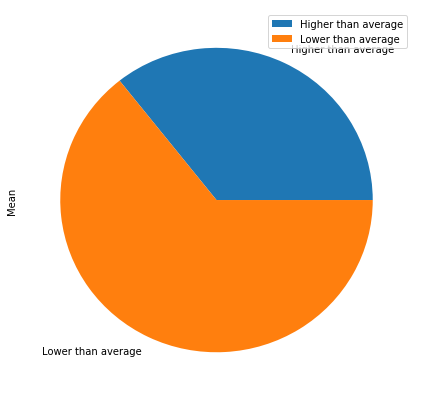

In [11]:
df_city_mean_distribution = pd.DataFrame({'Mean': [higher_mean_cities.index.size, lower_mean_cities.index.size]}, index = ['Higher than average', 'Lower than average'])
pie_plot = df_city_mean_distribution.plot.pie(y='Mean', figsize= [7,7])

In [12]:
higher_mean_cities['Mean'].mean()

16.10191152375751

In [13]:
lower_mean_cities['Mean'].mean()

12.379243570347956

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

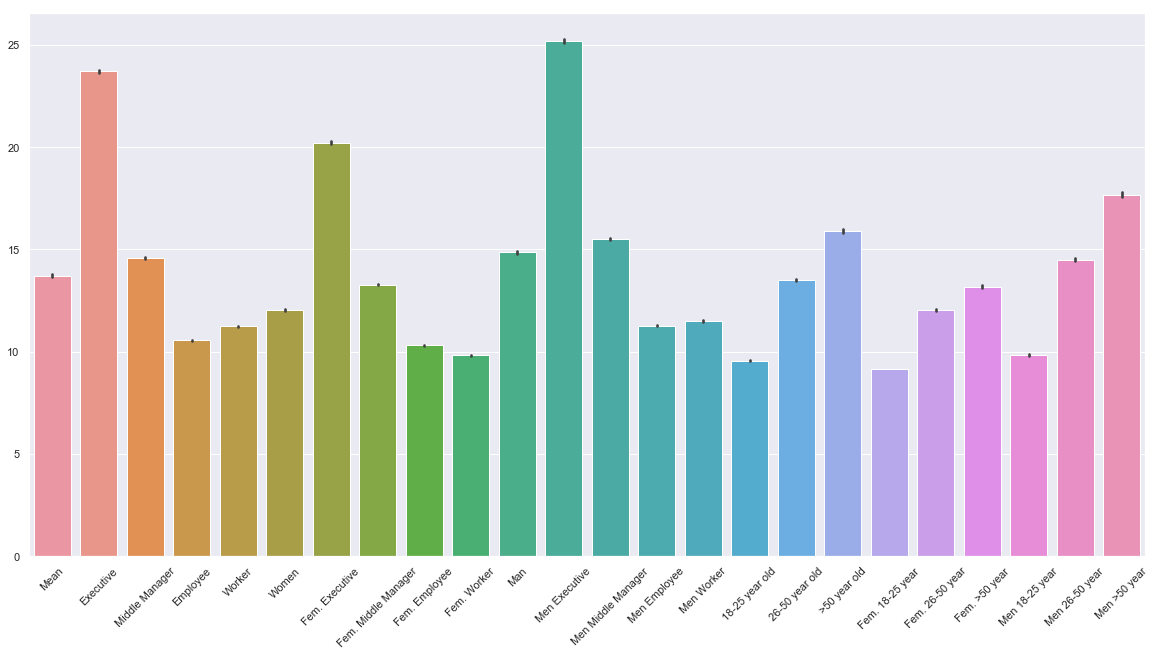

In [14]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=df_renamed)
plt.xticks(rotation=45)

### Distribution of average salary in country

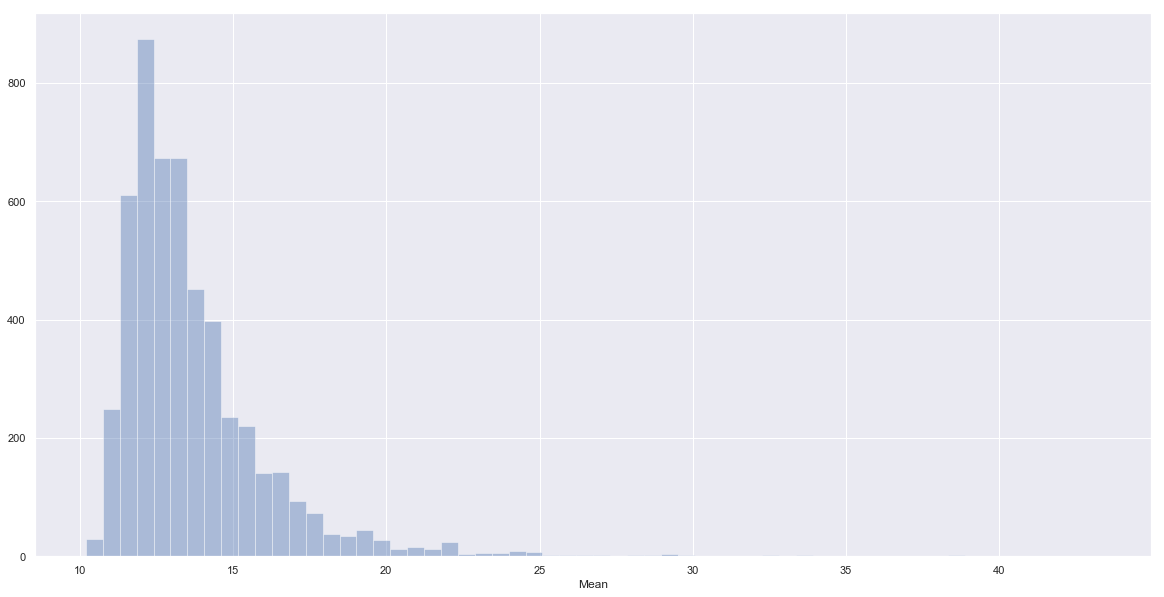

In [15]:
sns.distplot(df_renamed['Mean'],kde=False, bins = 60)

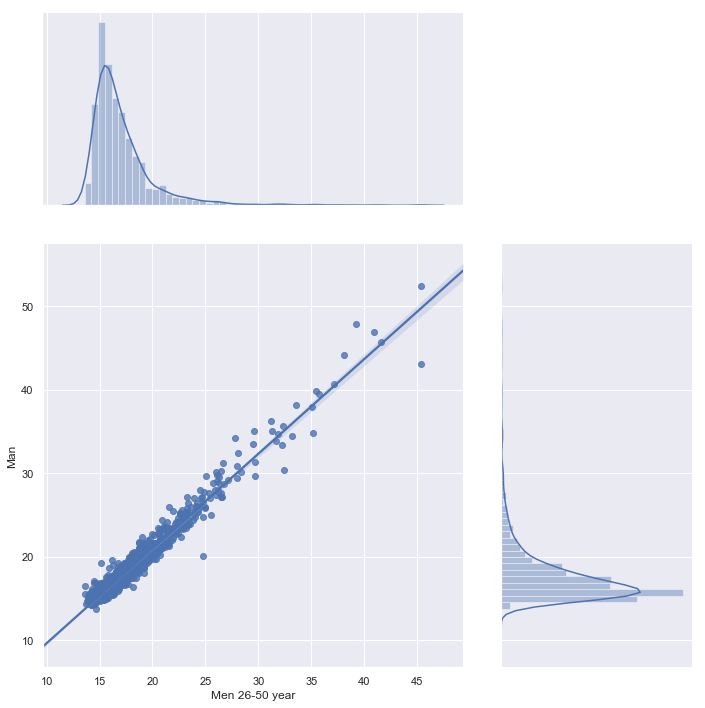

In [27]:

sns.jointplot(x='Men 26-50 year', y='Man', data=higher_mean_cities, kind='reg', height=10, ratio=2)

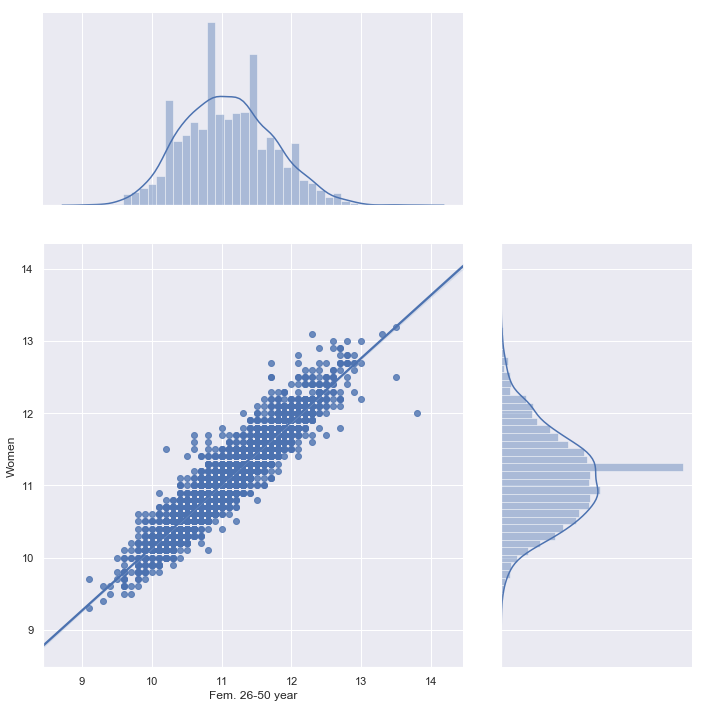

In [26]:
sns.jointplot(x='Fem. 26-50 year', y='Women', data=lower_mean_cities, kind='reg', height=10, ratio=2)

In [18]:
# sns.barplot(data=df_renamed[['Man', 'Women']], estimator=np.std)
# sns.barplot(data=df_renamed[['Mean','Man', 'Women']])
# sns.countplot(x='Mean', data=top)

In [19]:
top10_cities = df_renamed[df_renamed['Mean']>=hour_mean].sort_values(by='Mean', ascending=False).head(10)
top10_cities

,City,Mean,Executive,Middle Manager,Employee,Worker,Women,Fem. Executive,Fem. Middle Manager,Fem. Employee,...,Men Worker,18-25 year old,26-50 year old,>50 year old,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
4225,Saint-Nom-la-Bretèche,43.3,51.5,37.2,15.6,33.5,24.4,31.8,18.6,14.9,...,35.3,11.4,38.1,56.9,11.4,24.7,25.9,11.4,45.4,68.6
4170,Feucherolles,38.7,47.8,29.0,15.5,25.1,22.8,29.6,16.6,16.1,...,26.4,10.0,32.3,54.0,10.2,21.9,27.1,9.8,39.2,65.8
4173,Fourqueux,38.6,45.9,19.1,16.5,46.3,23.4,31.0,17.5,13.6,...,53.2,11.5,34.2,49.6,9.7,23.4,26.2,12.6,40.9,59.9
4872,Neuilly-sur-Seine,36.7,47.8,23.4,15.7,22.9,26.7,35.5,19.0,14.6,...,23.5,12.6,34.4,47.6,12.0,26.6,31.0,13.2,41.6,61.3
4237,Le Vésinet,36.3,46.7,19.9,15.1,22.0,25.2,33.4,16.5,13.5,...,23.8,11.3,32.3,50.5,10.9,24.7,30.3,11.6,38.1,62.1
4194,Mareil-Marly,34.5,42.3,19.6,15.5,27.5,23.7,30.4,16.7,13.5,...,27.4,11.0,31.7,42.3,10.9,23.3,26.4,11.0,37.1,49.8
4156,Chambourcy,33.7,39.2,54.6,13.8,19.0,19.7,29.8,16.2,12.3,...,19.8,10.5,35.0,35.6,10.8,19.8,22.1,10.3,45.4,43.6
4169,L'Étang-la-Ville,33.6,42.0,19.8,15.9,24.4,23.6,30.7,16.7,14.7,...,23.8,11.5,30.6,41.6,11.4,23.7,25.8,11.6,35.4,49.2
4881,Vaucresson,32.8,42.9,19.2,15.4,19.2,25.2,33.1,17.0,14.8,...,20.1,10.9,30.1,42.2,10.5,25.5,27.0,11.2,33.6,51.7
4164,Croissy-sur-Seine,32.7,42.8,18.9,14.9,20.8,23.1,30.5,17.2,14.0,...,20.8,11.0,30.3,41.1,10.4,23.5,24.7,11.5,35.7,50.5


In [20]:
bottom10_cities = df_renamed[df_renamed['Mean']<hour_mean].sort_values(by='Mean', ascending=True).head(10)
bottom10_cities

,City,Mean,Executive,Middle Manager,Employee,Worker,Women,Fem. Executive,Fem. Middle Manager,Fem. Employee,...,Men Worker,18-25 year old,26-50 year old,>50 year old,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
1184,Bagnères-de-Luchon,10.2,19.6,12.5,9.2,8.8,9.6,19.8,10.8,9.2,...,9.1,9.0,9.9,11.8,9.1,9.6,10.1,8.8,10.2,13.7
2237,Miramont-de-Guyenne,10.3,20.6,13.0,9.3,9.4,9.5,15.3,11.7,9.3,...,9.7,8.1,10.2,11.4,7.8,9.7,9.9,8.4,10.4,12.5
604,Saint-Savinien,10.3,20.7,12.4,9.7,8.7,10.1,17.9,11.9,9.4,...,8.9,8.7,9.8,12.2,8.6,9.6,12.0,8.7,10.0,12.3
763,Aubusson,10.3,19.5,12.7,9.5,8.7,9.6,16.6,11.5,9.3,...,9.1,8.5,9.8,11.7,8.4,9.3,10.5,8.5,10.1,12.7
4314,Blaye-les-Mines,10.3,21.1,12.4,9.5,9.0,9.6,15.6,11.3,9.3,...,9.4,8.5,10.1,11.9,8.5,9.6,10.0,8.5,10.4,13.7
5135,Cilaos,10.4,21.0,13.3,8.9,10.2,9.8,18.3,13.0,8.7,...,10.3,8.9,10.2,12.6,9.0,9.5,11.8,8.9,10.4,12.9
5132,Salazie,10.4,17.3,13.8,9.6,9.8,9.8,13.2,11.4,9.6,...,10.0,9.0,10.6,11.4,8.9,9.9,10.5,9.0,11.0,11.7
1137,La Grand-Combe,10.4,16.0,12.1,9.6,10.0,9.7,19.1,11.2,9.0,...,10.2,9.0,10.1,11.5,8.5,9.1,11.3,9.5,10.6,11.7
230,Ruoms,10.5,21.9,14.1,9.5,8.3,9.8,23.6,12.6,9.5,...,9.3,8.0,10.4,11.8,7.8,9.8,10.5,8.1,10.9,13.2
1176,Le Vigan,10.5,21.4,12.4,9.2,8.9,10.3,18.5,12.3,9.1,...,8.9,8.0,9.7,12.4,8.2,9.9,11.2,7.9,9.6,13.5


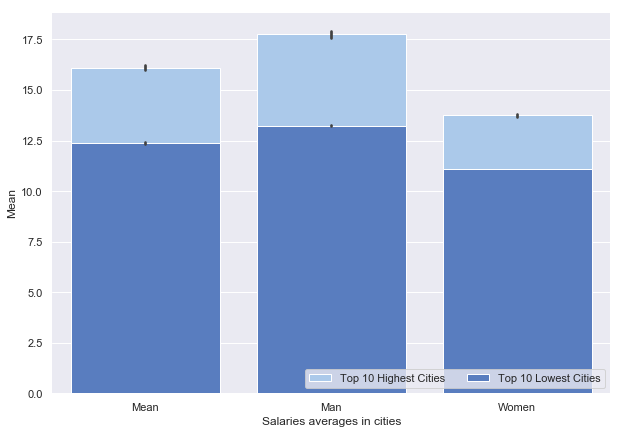

In [21]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(data=higher_mean_cities[['Mean','Man', 'Women']],
            label="Top 10 Highest Cities", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(data=lower_mean_cities[['Mean','Man', 'Women']],
            label="Top 10 Lowest Cities", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Mean",
       xlabel="Salaries averages in cities")
sns.despine(left=True, bottom=True)

Graphic shows that women who works in wealthier cities barely earns more than man who works in lower average salary cities.
Also the gap between women are less than men.

In [22]:
low = lower_mean_cities[['City', 'Mean','Fem. 18-25 year','Fem. 26-50 year', 'Fem. >50 year', 'Men 18-25 year','Men 26-50 year', 'Men >50 year']].sort_values(by='Mean')

In [23]:
top = higher_mean_cities[['City', 'Mean','Fem. 18-25 year','Fem. 26-50 year', 'Fem. >50 year', 'Men 18-25 year','Men 26-50 year', 'Men >50 year']].sort_values(by='Mean', ascending=False)


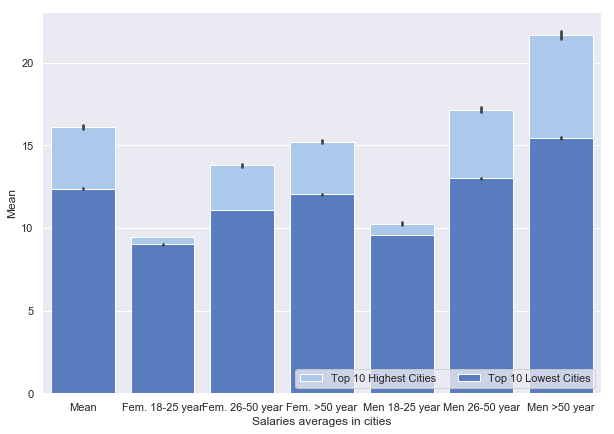

In [24]:
f, ax = plt.subplots(figsize=(10, 7))

sns.set_color_codes("pastel")
sns.barplot(data=top,
            label="Top 10 Highest Cities", color="b")

sns.set_color_codes("muted")
sns.barplot(data=low,
            label="Top 10 Lowest Cities", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Mean",
       xlabel="Salaries averages in cities")
sns.despine(left=True, bottom=True)

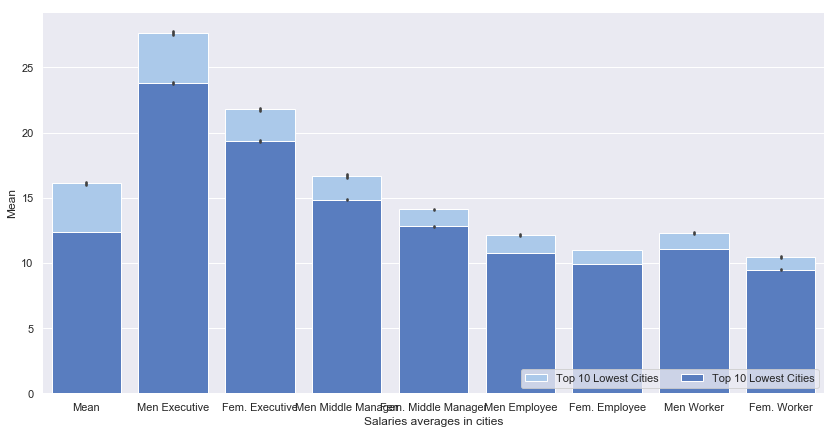

In [25]:
f, ax = plt.subplots(figsize=(14, 7))

sns.set_color_codes("pastel")
# sns.barplot(data=lower_mean_cities[['City', 'Mean','Fem. Executive','Fem. Middle Manager','Fem. Employee', 'Fem. Worker']].sort_values(by='Mean', ascending=False),
#             label="Top 10 Highest Cities", color="b")
sns.barplot(data=higher_mean_cities[['City', 'Mean', 'Men Executive','Fem. Executive', 'Men Middle Manager', 'Fem. Middle Manager','Men Employee', 'Fem. Employee','Men Worker',  'Fem. Worker']].sort_values(by='Mean', ascending=True),
            label="Top 10 Lowest Cities", color="b")

sns.set_color_codes("muted")
sns.barplot(data=lower_mean_cities[['City', 'Mean', 'Men Executive' ,'Fem. Executive','Men Middle Manager', 'Fem. Middle Manager','Men Employee', 'Fem. Employee','Men Worker',  'Fem. Worker']].sort_values(by='Mean', ascending=True),
            label="Top 10 Lowest Cities", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Mean",
       xlabel="Salaries averages in cities")
sns.despine(left=True, bottom=True)

In [32]:
df_industry = pd.read_csv('base_etablissement_par_tranche_effectif.csv')

In [34]:
df_industry.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


In [38]:
full_data = df_industry.merge(df_renamed, how="left", left_on = "CODGEO", right_on="CODGEO")

In [39]:
full_data

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,...,Men Worker,18-25 year old,26-50 year old,>50 year old,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01006,Ambléon,82,01,4,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01007,Ambronay,82,01,124,87,20,10,5,2,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
6,01008,Ambutrix,82,01,48,28,15,2,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01009,Andert-et-Condon,82,01,22,17,4,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01010,Anglefort,82,01,33,23,8,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01011,Apremont,82,01,14,11,2,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
